In [2]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
import symreg
from gpbenchmarks import get_data

from experiment_settings import nguyen7_funset, pagie_funset, keijzer_funset, korns12_funset, vlad_funset


In [3]:
kw_params = {'real_valued': True, 'max_back': 20}

params_nguyen4 = tengp.Parameters(2, 1, 1, 50, nguyen7_funset, **kw_params)
params_nguyen7 = tengp.Parameters(2, 1, 1, 50, nguyen7_funset, **kw_params)
params_nguyen10 = tengp.Parameters(3, 1, 1, 50, nguyen7_funset, **kw_params)
params_pagie1  = tengp.Parameters(2, 1, 1, 50, pagie_funset, **kw_params)
params_keijzer6 = tengp.Parameters(2, 1, 1, 50, keijzer_funset, **kw_params)
params_korns = tengp.Parameters(6, 1, 1, 50, korns12_funset, **kw_params)
params_vlad = tengp.Parameters(6, 1, 1, 50, vlad_funset, **kw_params)

In [4]:
import random 

data = [
    ('nguyen4', symreg.get_benchmark_poly(random, 6), params_nguyen4),
    ('nguyen7', symreg.get_benchmark_nguyen7(random, None), params_nguyen7),
    ('nguyen10', symreg.get_benchmark_nguyen10(random, None), params_nguyen10),
    ('pagie1', symreg.get_benchmark_pagie1(random, None), params_pagie1),
    ('keijzer6', symreg.get_benchmark_keijzer(random, 6), params_keijzer6),
    ('korns12', symreg.get_benchmark_korns(random, 12), params_korns),
    ('vladislasleva4', symreg.get_benchmark_vladislasleva4(random, None), params_vlad)
]

In [5]:
%%time
results = []
champions = []


for name, (x_train, y_train, x_test, y_test), params in data:
    print(name)
    bounds = tengp.individual.IndividualBuilder(params).create().bounds[:]
    
    x_train = np.c_[x_train, np.ones(len(x_train))]
    
    problem_results = []
    random.seed(42)
    for i in range(1):
        print(i, end=',')
        
        res = tengp.simple_es(x_train, y_train, mean_squared_error, params, mutation='single', evaluations=10000)
               
        problem_results.append(res[0].fitness)
    results.append(problem_results)

nguyen4
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(x, y, out=np.copy(x), where=x!=0)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in multiply
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)


nguyen7
0,nguyen10
0,pagie1
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in power
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in power
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:41: RuntimeWarning: divide by zero encountered in reciprocal
  return x**(-1)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in power
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: overflow encountered in power
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: divide by zero encountered in power
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-nota

keijzer6
0,korns12
0,

/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:38: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:26: RuntimeWarning: overflow encountered in power
  return x**3
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:23: RuntimeWarning: overflow encountered in square
  return x**2
/home/jarino/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


vladislasleva4
0,CPU times: user 4min 10s, sys: 4.91 s, total: 4min 15s
Wall time: 5min 20s


In [6]:
def plot_results(name, outs):
    print(name)
    costs = np.array(outs)
    print('min:', np.min(costs))
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    plt.figure()
    plt.title(name)
    sns.distplot(costs, kde=False);
    

nguyen4
min: 0.0015393915259855832
mean: 0.0015393915259855832
median: 0.0015393915259855832
variance: 0.0
nguyen7
min: 9.4475215296178e-05
mean: 9.4475215296178e-05
median: 9.4475215296178e-05
variance: 0.0
nguyen10
min: 0.0020446276610901746
mean: 0.0020446276610901746
median: 0.0020446276610901746
variance: 0.0
pagie1
min: 0.15457785699682083
mean: 0.15457785699682083
median: 0.15457785699682083
variance: 0.0
keijzer6
min: 0.12298672115448732
mean: 0.12298672115448732
median: 0.12298672115448732
variance: 0.0
korns12
min: 1.1047458706509048
mean: 1.1047458706509048
median: 1.1047458706509048
variance: 0.0
vladislasleva4
min: 0.03302080704413444
mean: 0.03302080704413444
median: 0.03302080704413444
variance: 0.0


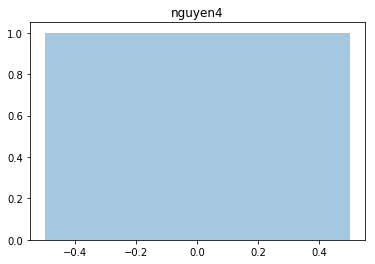

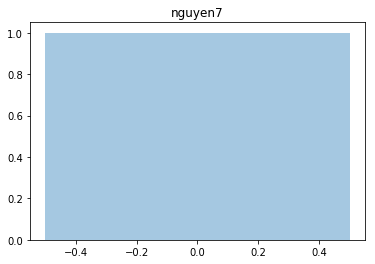

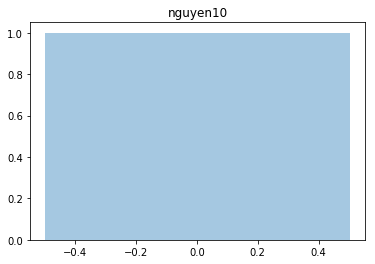

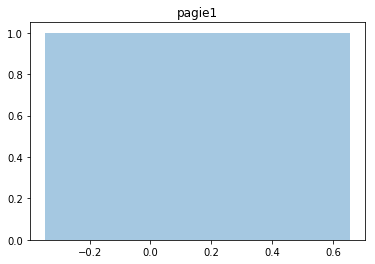

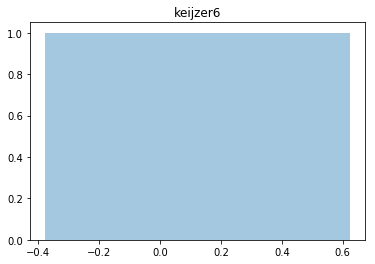

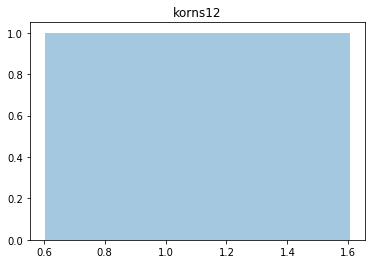

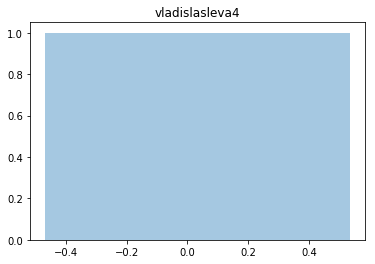

In [7]:
%matplotlib inline

for d, result in zip(data, results):
    plot_results(d[0], result)